# Companion Notebook for Assignment 1: Processing Data in Python


## Getting started with pandas

We start by importing the libraries we're going to use: `pandas` and `matplotlib`

In [95]:
import pandas as pd
%matplotlib inline

## Loading data into a DataFrame

The pandas DataFrame is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes. It's basically a spreadsheet you can program and it's an incredibly useful Python object for data analysis. 

You can load data into a dataframe using pandas' excellent `read_*` functions.

We're going to try two of them: read_csv and read_sql.

*Pro tip*: Jupyter will output the docstring (i.e., source code comments) for a command just by asking it a question.

In [96]:
pd.read_sql?
pd.read_csv?

Now let's read data in from a CSV file:

In [97]:
df = pd.read_csv('https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/hypothyroid.csv')

## Viewing your dataframe

You can use `head` and `tail` to get a view of your data.

In [98]:
df.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Thyroid Surgery,Query Hypothyroid,Query Hyperthyroid,Pregnant,Sick,...,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Class
0,72.0,M,f,f,f,f,f,f,f,f,...,0.6,y,15.0,y,1.48,y,10.0,n,NaN,hypothyroid
1,15.0,F,t,f,f,f,f,f,f,f,...,1.7,y,19.0,y,1.13,y,17.0,n,NaN,hypothyroid
2,24.0,M,f,f,f,f,f,f,f,f,...,0.2,y,4.0,y,1.00,y,0.0,n,NaN,hypothyroid
3,24.0,F,f,f,f,f,f,f,f,f,...,0.4,y,6.0,y,1.04,y,6.0,n,NaN,hypothyroid
4,77.0,M,f,f,f,f,f,f,f,f,...,1.2,y,57.0,y,1.28,y,44.0,n,NaN,hypothyroid


We can get a sense for the size and shape of the data using `shape`

In [99]:
df.shape

(3163, 26)

## Columns

Columns typically represent features of a given instance or record in the dataframe. You can use the `.columns` attribute to print a list of all columns:

In [100]:
df.columns

Index(['Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Thyroid Surgery', 'Query Hypothyroid',
       'Query Hyperthyroid', 'Pregnant', 'Sick', 'Tumor', 'Lithium', 'Goitre',
       'TSH Measured', 'TSH', 'T3 Measured', 'T3', 'TT4 Measured', 'TT4',
       'T4U Measured', 'T4U', 'FTI Measured', 'FTI', 'TBG Measured', 'TBG',
       'Class'],
      dtype='object')

Get a sense for the type of each column using `dtypes`:

In [101]:
df.dtypes

Age                          float64
Sex                           object
On Thyroxine                  object
Query on Thyroxine            object
On Antithyroid Medication     object
Thyroid Surgery               object
Query Hypothyroid             object
Query Hyperthyroid            object
Pregnant                      object
Sick                          object
Tumor                         object
Lithium                       object
Goitre                        object
TSH Measured                  object
TSH                          float64
T3 Measured                   object
T3                           float64
TT4 Measured                  object
TT4                          float64
T4U Measured                  object
T4U                          float64
FTI Measured                  object
FTI                          float64
TBG Measured                  object
TBG                          float64
Class                         object
dtype: object

To access a single column as a series, you can reference its name as a string in square brackets:

In [102]:
df['On Antithyroid Medication']

0       f
1       f
2       f
3       f
4       f
       ..
3158    f
3159    f
3160    f
3161    f
3162    f
Name: On Antithyroid Medication, Length: 3163, dtype: object

To plot a series, use the `.plot()` function

To access multiple columns as a dataframe, you can use a list of column names:

In [103]:
df[['On Antithyroid Medication', 'Thyroid Surgery']]

,On Antithyroid Medication,Thyroid Surgery
0,f,f
1,f,f
2,f,f
3,f,f
4,f,f
...,...,...
3158,f,f
3159,f,f
3160,f,f
3161,f,f


## Basic views into the data

Lets get a better sense what these fields look like. 

Let's start by describing the entire dataset using the `describe` function.

In [104]:
df.describe()

,Age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


It looks like `describe` only works on numerical columns. For categorical data, we can use `value_counts` to check one column at a type:

In [105]:
df['On Antithyroid Medication'].value_counts()

f    3121
t      42
Name: On Antithyroid Medication, dtype: int64

Value counts is also useful for plotting data:

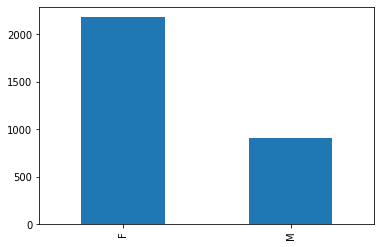

In [106]:
df['Sex'].value_counts().plot(kind='bar')

The `normalize=True` option will give us the fraction of all instances that have each value.

In [107]:
df['On Antithyroid Medication'].value_counts(normalize=True)

f    0.986721
t    0.013279
Name: On Antithyroid Medication, dtype: float64

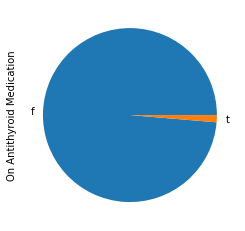

In [108]:
df['On Antithyroid Medication'].value_counts(normalize=True).plot(kind='pie')

Let's see if there are missing values for age in this dataset.

In [109]:
pd.value_counts(df['Age'].isnull())

False    2717
True      446
Name: Age, dtype: int64

What if we wanted to fill or drop the missing values? We can use `fillna` and `dropna`

In [110]:
df['Age'] = df['Age'].fillna(-1)

In [111]:
pd.value_counts(df['Age'].isnull())

False    3163
Name: Age, dtype: int64

## Selecting and Subsetting Data

Let's say we just wanted to work with the cases where the individual's age is unrecorded. We can subset using conditional logic.

In [112]:
df[df['Age'] == -1]

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Thyroid Surgery,Query Hypothyroid,Query Hyperthyroid,Pregnant,Sick,...,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Class
26,-1.0,M,f,f,f,t,f,f,f,f,...,1.0,y,32.0,y,0.78,y,41.0,n,NaN,hypothyroid
44,-1.0,F,f,f,f,f,f,f,f,f,...,1.4,y,78.0,y,0.98,y,80.0,n,NaN,hypothyroid
50,-1.0,F,f,f,f,f,f,f,f,f,...,0.4,y,9.7,y,1.46,y,6.6,n,NaN,hypothyroid
59,-1.0,NaN,f,f,f,f,f,f,f,f,...,0.6,y,21.0,y,0.97,y,22.0,n,NaN,hypothyroid
61,-1.0,F,f,f,f,f,f,f,f,f,...,0.3,y,18.0,y,1.06,y,17.0,n,NaN,hypothyroid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,-1.0,M,f,f,f,f,f,f,f,f,...,2.4,y,109.0,y,1.12,y,97.0,n,NaN,negative
3143,-1.0,F,f,f,f,f,f,f,f,f,...,1.0,y,58.0,y,0.87,y,67.0,n,NaN,negative
3146,-1.0,F,f,f,f,f,f,t,f,f,...,1.8,y,61.0,y,0.82,y,74.0,n,NaN,negative
3149,-1.0,NaN,f,f,f,f,f,f,f,f,...,2.0,y,118.0,y,1.04,y,113.0,n,NaN,negative


You can retrieve parts, or slices, of a series or dataframe by range using the [] operator - just like in Python lists.

In [113]:
df[3:6]
# equivalent to df.iloc[3:6]

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Thyroid Surgery,Query Hypothyroid,Query Hyperthyroid,Pregnant,Sick,...,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Class
3,24.0,F,f,f,f,f,f,f,f,f,...,0.4,y,6.0,y,1.04,y,6.0,n,NaN,hypothyroid
4,77.0,M,f,f,f,f,f,f,f,f,...,1.2,y,57.0,y,1.28,y,44.0,n,NaN,hypothyroid
5,85.0,F,f,f,f,f,t,f,f,f,...,1.1,y,27.0,y,1.19,y,23.0,n,NaN,hypothyroid


You can also use `loc` to slice both rows and columns by text labels, or `iloc` to slice by integer positions. For example:

In [114]:
df.loc[3:6] # print all columns

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Thyroid Surgery,Query Hypothyroid,Query Hyperthyroid,Pregnant,Sick,...,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Class
3,24.0,F,f,f,f,f,f,f,f,f,...,0.4,y,6.0,y,1.04,y,6.0,n,NaN,hypothyroid
4,77.0,M,f,f,f,f,f,f,f,f,...,1.2,y,57.0,y,1.28,y,44.0,n,NaN,hypothyroid
5,85.0,F,f,f,f,f,t,f,f,f,...,1.1,y,27.0,y,1.19,y,23.0,n,NaN,hypothyroid
6,64.0,F,f,f,f,t,f,f,f,f,...,1.3,y,54.0,y,0.86,y,63.0,n,NaN,hypothyroid


In [115]:
df.loc[3:6, 'Age'] # print a slice of one column

3    24.0
4    77.0
5    85.0
6    64.0
Name: Age, dtype: float64

In [116]:
df.iloc[3:6, 0] # print a slice of column 0 (Age)

3    24.0
4    77.0
5    85.0
Name: Age, dtype: float64

## Exporting data

Pandas supports saving DataFrames to a variety of file formats using the `to_*` function. Let's save our updated data as a csv.

In [117]:
df.to_csv("hypothyroid_1.csv")

## Groupby

Often we want to examine difference among groups based on categorical values. For this `groupby` is incredibly valuable

In [131]:
df.groupby('Sex').mean()

,Age,TSH,T3,TT4,T4U,FTI,TBG
Sex,,,,,,,
F,44.605866,6.536341,1.986890,113.706231,1.019737,113.349570,32.486636
M,44.685022,4.547664,1.812647,96.474541,0.906972,108.038373,23.210526


## Data munging functions

pandas provides a variety of other useful functions, including:

```
pivot
pivot_tables
stack/unstack
melt
get_dummies
factorize
```

## Grouping and plotting!

In [119]:
grouped = df[['Age', 'Sex', 'TSH']].groupby('Age').mean()
print(grouped)

             TSH
Age             
-1.0    5.382005
 1.0    0.533333
 4.0    0.400000
 5.0   17.000000
 6.0    4.050000
...          ...
 90.0   0.900000
 92.0   0.400000
 93.0   2.700000
 97.0   3.200000
 98.0   0.000000

[93 rows x 1 columns]


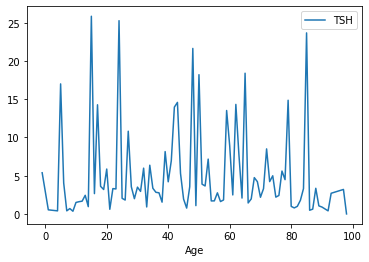

In [121]:
grouped.plot(kind='line')